In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tabela_tramitas = pd.read_csv("NovoArquivo.csv")
pd.set_option("display.max_columns", None)
display(tabela_tramitas)

,PROTOCOLO,DATA ENTRADA,SUBCATEGORIA,JURISDICIONADO,EXERCÍCIO,RELATOR,JUNTADO,SETOR,ESTÁGIO,INTERESSADOS,DIGITAL,JULGADO,ASSUNTO
0,04731/78,17/08/1978,Licitações,Tribunal de Justiça,1978.0,NaN,Livre,ARQUIVO,Finalizado,,Não,Sim,DISPENSA DE LICITAÇÃO
1,02344/85,10/11/1985,Licitações,Instituto de Assistência à Saúde do Servidor -...,1985.0,Conselheiro Marcos Ubiratan Guedes Pereira,Livre,DIARQ,Finalizado,,Não,Sim,CONVITE Nº 02/85
2,06865/85,11/10/1985,Licitações,Departamento de Estradas de Rodagem,1985.0,NaN,Livre,ARQUIVO,Finalizado,,Não,Sim,Concorrência nº 07/85 e Contrato n Pj 35/85 - ...
3,07213/85,24/10/1985,Licitações,Secretaria de Recursos Hídricos,1985.0,Oscar Mamede Santiago Melo,Livre,ARQUIVO,Finalizado,Apolônio Zenaide Nóbrega Montenegro Filho / En...,Misto,Sim,CONCORRENCIA Nº 01/85 E CONTRATO Nº 61/85 PRO...
4,04712/86,1/7/1986,Licitações,Departamento de Estradas de Rodagem,1986.0,Oscar Mamede Santiago Melo,Livre,DIARQ,Finalizado,,Não,Sim,"Convite nº 17/86, seguida de Contrato nº PJ20/86"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83992,06216/24,21/09/2024,Contratação Pública,"DAESA - Departamento de Água, Esgoto e Saneame...",2024.0,Conselheiro Substituto Renato Sérgio Santiago ...,Livre,DIACOP1,Planejado - Relatório Inicial,Inojosa Primeiro Neto / John Johnson Gonçalves...,Sim,Não,Licitação - 00043/2024 - Pregão (Lei Nº 14.133...
83993,06599/24,19/10/2024,Contratação Pública,Prefeitura Municipal de Jacaraú,2024.0,Conselheiro Substituto Marcus Vinicius Carvalh...,Livre,DIACOP1,Planejado - Relatório Inicial,Elias costa Paulino Lucas / Tassio Pereira da ...,Sim,Não,Licitação - 00012/2024 - Pregão (Lei Nº 14.133...
83994,06703/24,24/10/2024,Termo Aditivo,Superintendência de Obras do Plano de Desenv. ...,2024.0,Conselheiro Fernando Rodrigues Catão,Livre,FRC,Agendado para Sessão,Geysiele Vieira da Silva / Simone Cristina Coe...,Sim,Não,Processo formalizado a partir do documento nº ...
83995,06704/24,24/10/2024,Contratação Pública,Prefeitura Municipal de Uirauna,2021.0,NaN,Livre,FTFN,Formalizado,Maria Sulene Dantas Sarmento,Sim,Não,Licitação - 00002/2021 - Tomada de Preços (Lei...


In [4]:
tabela_tramitas['DATA ENTRADA'] = pd.to_datetime(tabela_tramitas['DATA ENTRADA'], format='mixed')
tabela_tramitas['Mes'] = tabela_tramitas['DATA ENTRADA'].dt.to_period('M')
tabela_tramitas['Ano'] = tabela_tramitas['DATA ENTRADA'].dt.to_period('Y')

# 1. Quantidade de relatórios por subcategoria

In [5]:
relatorios_por_subcategorias = tabela_tramitas['SUBCATEGORIA'].value_counts()
relatorios_por_subcategorias = relatorios_por_subcategorias.to_frame()
relatorios_por_subcategorias.columns = ['Relatórios por subcategoria']
relatorios_por_subcategorias

,Relatórios por subcategoria
SUBCATEGORIA,
Contrato,36277
Licitações,32224
Termo Aditivo,15351
Ordem de Serviço,99
Contratação Pública,46


# 2. Quais relatores possuem mais relatórios

In [6]:
relatorios_por_relator = tabela_tramitas['RELATOR'].value_counts()
relatorios_por_relator = relatorios_por_relator.to_frame()
relatorios_por_relator.columns = ['Relatórios por Relator']
relatorios_por_relator.head(10)

,Relatórios por Relator
RELATOR,
Oscar Mamede Santiago Melo,3151
Conselheiro Arnóbio Alves Viana,2866
Conselheiro Substituto Antônio Cláudio Silva Santos,2558
Conselheiro André Carlo Torres Pontes,2536
Conselheiro Fernando Rodrigues Catão,2237
Conselheiro Substituto Antônio Gomes Vieira Filho,1949
Conselheiro Substituto Renato Sérgio Santiago Melo,1766
Conselheiro Antônio Nominando Diniz Filho,1534
Conselheiro Marcos Ubiratan Guedes Pereira,1436


In [7]:
estagio_dos_relatorios = tabela_tramitas ['ESTÁGIO'].value_counts()
estagio_dos_relatorios = estagio_dos_relatorios.to_frame()
estagio_dos_relatorios.columns = ['Estágio dos relatórios']
estagio_dos_relatorios

,Estágio dos relatórios
ESTÁGIO,
Juntado,51282
Finalizado,20496
Formalizado,8365
Decisão Publicada,3108
Estoque - Relatório Inicial,182
Defesa apresentada,173
Com Parecer do MPjTCE,102
Agendado para Sessão,45
Com Cota do MPjTCE,39


## 3.1 Estágios por ano

# 3. Quais os setores com mais relatórios

In [8]:
relatorios_por_setor = tabela_tramitas['SETOR'].value_counts()
relatorios_por_setor = relatorios_por_setor.to_frame()
relatorios_por_setor.columns = ['Relatórios por setor']
relatorios_por_setor.head(10)

,Relatórios por setor
SETOR,
ACERVO DIGITAL,47197
ARQUIVO,17809
ARQUIVO DIGITAL,14007
DIARQ,2884
AGVF,374
AAV,363
1CAM,293
APCL,279
FRC,117


# 4. 

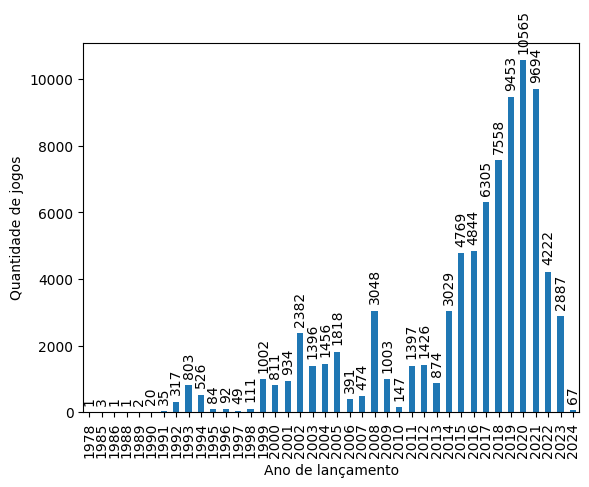

In [9]:
dados_2024_tramitas=tabela_tramitas[tabela_tramitas['Ano']<='2024']

dados_2024=dados_2024_tramitas.groupby('Ano')['PROTOCOLO'].count()

ax = dados_2024.plot(x='Ano', y='Nome', kind='bar',ylabel="Quantidade de jogos",xlabel="Ano de lançamento")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',rotation='vertical')
plt.show()

# 5. Estágio dos relatórios